In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['savefig.transparent'] = False
rcParams['savefig.facecolor'] = 'white'
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from data import load_data, load_rage

In [2]:
df = load_data(rage=False)

def print_opts(d):
    print('\npc name : {}'.format(' '.join(sorted(d['device_name'].unique()))))
    print('model_name : {}'.format(' '.join(sorted(d['model_name'].unique()))))
    print('simulator : {}'.format(' '.join(sorted(d['simulator'].unique()))))
    print('gpu_name : {}'.format(' '.join(sorted(d['gpu_name'].unique()))))
    print('sim_card : {}'.format(' '.join(sorted(d['sim_card'].unique()))))

In [3]:

model_names = ['Michaelis Menten', 'Schlögl','JNK Activation Cascade',  'EARM 1.0']
print_opts(df)
gpu_only = ['cuda', 'opencl']
gpu_only = df.loc[df.simulator.isin(gpu_only)].copy()
print_opts(gpu_only)


pc name : aws bad beerus buu diablo mule notch pct piccolo picollo puma
model_name : EARM 1.0 JNK Activation Cascade Michaelis Menten Schlögl
simulator : bng cl_amd_cpu cl_intel cl_intel     cl_intel_cpu cl_intel_gpu cuda opencl stochkit stochkit_64
gpu_name :  GTX1060 GTX1080 GTX980Ti HD530 RTX2080 RTX3090 Radeon Vii Ryzen_3900x TeslaK20c TeslaV100 i5_6500T
sim_card : GTX1060_bng GTX1060_cuda GTX1080_cuda GTX1080_opencl GTX980Ti_cuda GTX980Ti_opencl HD530_cl_intel_gpu RTX2080_bng RTX2080_cuda RTX2080_opencl RTX2080_stochkit RTX3090_cuda RTX3090_opencl Radeon Vii_opencl Ryzen_3900x_cl_amd_cpu TeslaK20c_cuda TeslaK20c_opencl TeslaV100_bng TeslaV100_cuda TeslaV100_opencl TeslaV100_stochkit TeslaV100_stochkit_64 _bng i5_6500T_cl_intel i5_6500T_cl_intel     i5_6500T_cl_intel_cpu

pc name : aws bad beerus buu diablo mule notch piccolo picollo puma
model_name : EARM 1.0 JNK Activation Cascade Michaelis Menten Schlögl
simulator : cuda opencl
gpu_name : GTX1060 GTX1080 GTX980Ti RTX2080 RTX309

In [4]:
main_pcs = ['bad', 'aws']
tesla_results = df.loc[df.device_name.isin(main_pcs)].copy()

In [5]:
print_opts(tesla_results)


pc name : aws bad
model_name : EARM 1.0 JNK Activation Cascade Michaelis Menten Schlögl
simulator : bng cuda opencl stochkit stochkit_64
gpu_name : TeslaV100
sim_card : TeslaV100_bng TeslaV100_cuda TeslaV100_opencl TeslaV100_stochkit TeslaV100_stochkit_64


In [6]:
tesla_results.head(10)

,device_name,end_time,gpu_name,model_name,n_sim,n_ts,sim_time,simulator,total_time,n_cpu,opencl_args,precision,sim_card
1,bad,20000,TeslaV100,EARM 1.0,256,101,6348.1372,bng,6356.825094,1,,fp64,TeslaV100_bng
2,bad,20000,TeslaV100,EARM 1.0,512,101,12628.2278,bng,12645.359526,1,,fp64,TeslaV100_bng
3,bad,20000,TeslaV100,EARM 1.0,1024,101,25805.2770,bng,25839.436697,1,,fp64,TeslaV100_bng
4,bad,20000,TeslaV100,EARM 1.0,2048,101,53670.9203,bng,53742.258672,1,,fp64,TeslaV100_bng
5,bad,20000,TeslaV100,EARM 1.0,4096,101,113075.9847,bng,113218.913081,1,,fp64,TeslaV100_bng
6,bad,20000,TeslaV100,EARM 1.0,8192,101,203555.3715,bng,203817.357286,1,,fp64,TeslaV100_bng
7,bad,20000,TeslaV100,EARM 1.0,16384,101,404603.9185,bng,405138.645481,1,,fp64,TeslaV100_bng
8,bad,20000,TeslaV100,EARM 1.0,32768,101,827438.2030,bng,828541.440838,1,,fp64,TeslaV100_bng
1,bad,100,TeslaV100,JNK Activation Cascade,256,101,1051.3700,bng,1056.029964,1,,fp64,TeslaV100_bng
2,bad,100,TeslaV100,JNK Activation Cascade,512,101,2102.8100,bng,2111.618109,1,,fp64,TeslaV100_bng


# Compare all models on Volta V100

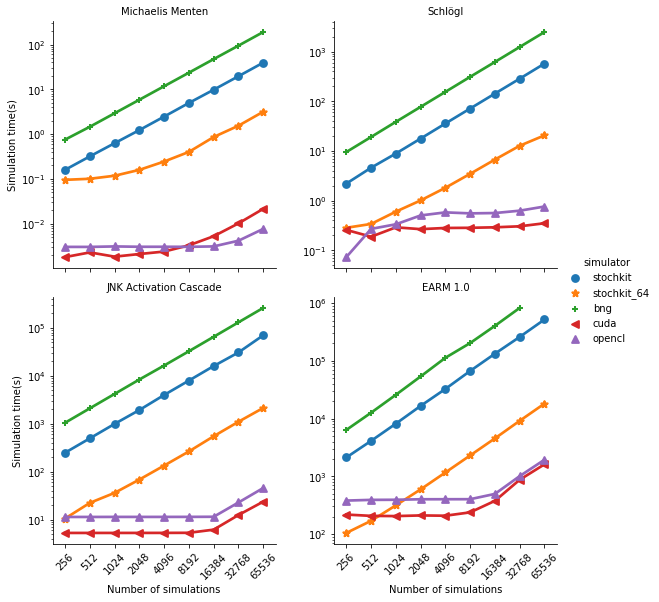

In [7]:
def compare_times(data, save_name="time_compare"):
    g = sns.catplot(
        x="n_sim", y="sim_time", hue="simulator", 
        col="model_name", kind="point", data=data, 
        sharey=False, col_wrap=2, height=4, 
        col_order =model_names,
        hue_order = ['stochkit', 'stochkit_64', 'bng', 'cuda', 'opencl'],
        markers=['o', '*', '+', '<', '^']
    )
    g.set_titles("{col_name}")
    g.set_axis_labels("Number of simulations", "Simulation time(s)")
    g.set(yscale="log")    
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    g.set_xticklabels(labels, rotation=45)
    plt.savefig('{}.png'.format(save_name), dpi=300, bbox_inches='tight')
    plt.savefig('{}.pdf'.format(save_name), dpi=300, bbox_inches='tight')
    
compare_times(tesla_results, 'all_models_timing')

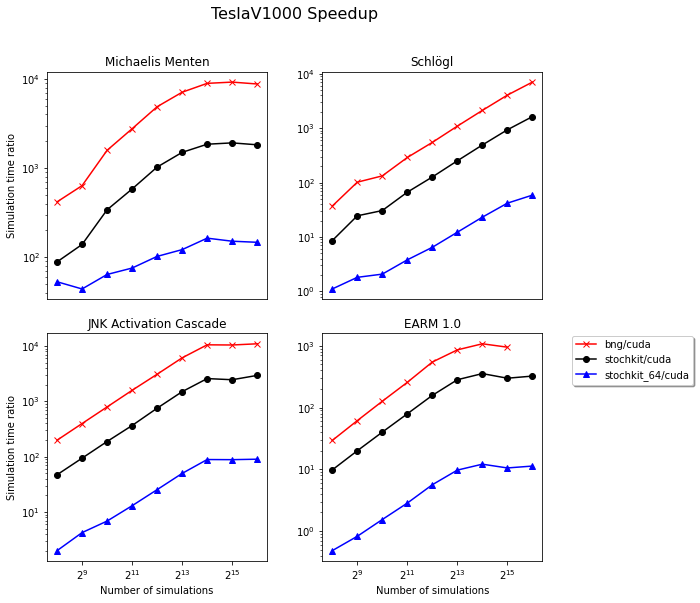

In [8]:
def plot_ratio(data, save_name="bng_gpu_ratio"):
    """
    Plots the ratio of BNG run times to GPU_SSA run times
    """

    d = pd.pivot_table(
        data[['model_name', 'n_sim', 'simulator', 'sim_time']],
        index=['model_name', 'n_sim'],
        columns='simulator',
        values='sim_time'
    )
    
    def f2(x):
        return '{0:.3f}'.format(x)
    d.to_latex('sum_table_latex.tex', 
               formatters={'bng': f2, 'cuda':f2, 'opencl':f2, 'stochkit':f2, 'stochkit_64':f2},
               bold_rows=True)
    d['ratio_bng'] = d['bng'] / d['cuda']
    d['ratio_stochkit'] = d['stochkit'] / d['cuda']
    d['ratio_stochkit_64'] = d['stochkit_64'] / d['cuda']
#     print(d[['ratio_bng', 'ratio_stochkit', 'ratio_stochkit_64']])
    d.reset_index(inplace=True)
    d.to_csv('all_times.csv')
    
    count = 1
    fig = plt.figure(figsize=(8, 9))
    for i in model_names:
        
        ax = plt.subplot(2,2, count)
        plt.title(i)
        df = d.loc[d.model_name==i][['n_sim', 'ratio_bng', 'ratio_stochkit', 'ratio_stochkit_64']]
        l1,= plt.plot(df['n_sim'], df['ratio_bng'], 'x-r', label='ratio_bng')
        l2,= plt.plot(df['n_sim'], df['ratio_stochkit'], 'o-k', label='ratio_stochkit')
        l3,= plt.plot(df['n_sim'], df['ratio_stochkit_64'], '^-b', label='ratio_stochkit_64')
        ax.set_xscale('log', base=2)    
        ax.set_yscale('log', base=10) 
        plt.ylabel("Simulation time ratio")
        plt.xlabel("Number of simulations")
        if count in (1,2):
            plt.xlabel('')
            plt.xticks([])
        if count in (2, 4):
            plt.ylabel('')
        count+=1
    lgd = fig.legend(
        [l1, l2, l3],
        ["bng/cuda", "stochkit/cuda", "stochkit_64/cuda"],
        fancybox=True, shadow=True, 
        bbox_to_anchor=(1.2, .48),
    )
    plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.15)
    plt.suptitle('TeslaV1000 Speedup', size=16)
    plt.savefig('{}.png'.format(save_name), dpi=300, bbox_inches='tight', bbox_extra_artists=(lgd,),)
    plt.savefig('{}.pdf'.format(save_name), dpi=300, bbox_inches='tight', bbox_extra_artists=(lgd,),)
plot_ratio(tesla_results)

# GPU scaling

For these tests, I ran the simulations on a 4-GPU rig using the OpenCLSSASimulator. The PCs name was RAGE (thus the load keyword). 

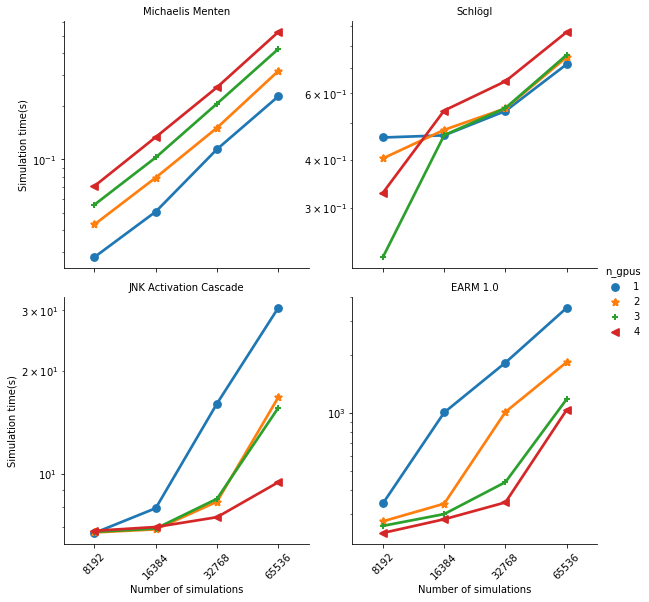

In [9]:
rage_df = load_data(rage=True)
rage = rage_df.loc[rage_df.precision == 'fp64'].copy()
rage = rage.loc[rage.simulator == 'opencl'].copy()
rage = rage[rage.opencl_args!=''].copy()
rage.head(5)
rage['opencl_args'].unique()
def count_gpus(x):
    return len(x.split(','))
rage['n_gpus'] = rage['opencl_args'].apply(count_gpus)
rage.head(10)


rage_large = rage.loc[rage.n_sim > 2**12].copy()
g = sns.catplot(
    x="n_sim", y="sim_time", hue="n_gpus", 
    col="model_name", kind="point", data=rage_large, 
    sharey=False, col_wrap=2, height=4, 
    col_order=model_names,
    hue_order = [1, 2, 3, 4],
    markers=['o', '*', '+', '<']
)
g.set_titles("{col_name}")
g.set_axis_labels("Number of simulations", "Simulation time(s)")
g.set(yscale="log")    
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
g.set_xticklabels(labels, rotation=45)

n_gpus            1            2            3            4
n_sim                                                     
65536   3520.032156  1840.455247  1182.482137  1040.511603


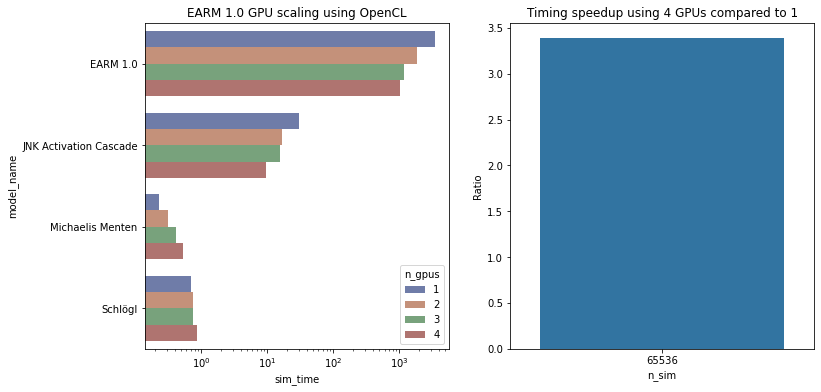

In [10]:
fig = plt.figure(figsize=(12, 6))
# ax = sns.barplot(x="model_name", y="sim_time", hue="n_gpus", data=rage_large,
#                 estimator=None)
fig.add_subplot(121)
rage_large = rage.loc[rage.n_sim > 2**15].copy()

earm_only = rage_large.loc[rage_large.model_name == 'EARM 1.0'].copy()
g = sns.barplot(
    data=rage_large, 
    x="sim_time", y="model_name", hue="n_gpus",
    ci="sd", palette="dark", alpha=.6, orient='horizonal'
)
g.set(xscale="log") 
plt.title("EARM 1.0 GPU scaling using OpenCL")

fig.add_subplot(122)
pivot_earm_only = pd.pivot_table(earm_only, index='n_sim', values='sim_time', columns=['n_gpus'])
print(pivot_earm_only.head(5))
pivot_earm_only['ratio'] = pivot_earm_only[1]/pivot_earm_only[4]
# print(ratio.head(5))
pivot_earm_only.reset_index(inplace=True)
sns.barplot(data=pivot_earm_only,x='n_sim', y='ratio')
plt.ylabel("Ratio")
plt.title("Timing speedup using 4 GPUs compared to 1")
save_name = 'earm_gpu_scaling'
plt.savefig('{}.png'.format(save_name), dpi=300, bbox_inches='tight', transparent=False)
plt.savefig('{}.pdf'.format(save_name), dpi=300, bbox_inches='tight')
    
    

  device_name  end_time   gpu_name model_name  n_sim  n_ts    sim_time  \
1        rage     20000  TeslaV100   EARM 1.0    256   101  227.136701   
2        rage     20000  TeslaV100   EARM 1.0    512   101  236.707293   
3        rage     20000  TeslaV100   EARM 1.0   1024   101  231.133598   
4        rage     20000  TeslaV100   EARM 1.0   2048   101  239.937898   
5        rage     20000  TeslaV100   EARM 1.0   4096   101  235.493187   

  simulator  total_time  n_cpu opencl_args precision          sim_card  
1    opencl  227.308933      1         0:3      fp32  TeslaV100_opencl  
2    opencl  236.887255      1         0:3      fp32  TeslaV100_opencl  
3    opencl  231.428516      1         0:3      fp32  TeslaV100_opencl  
4    opencl  240.471229      1         0:3      fp32  TeslaV100_opencl  
5    opencl  236.499417      1         0:3      fp32  TeslaV100_opencl  


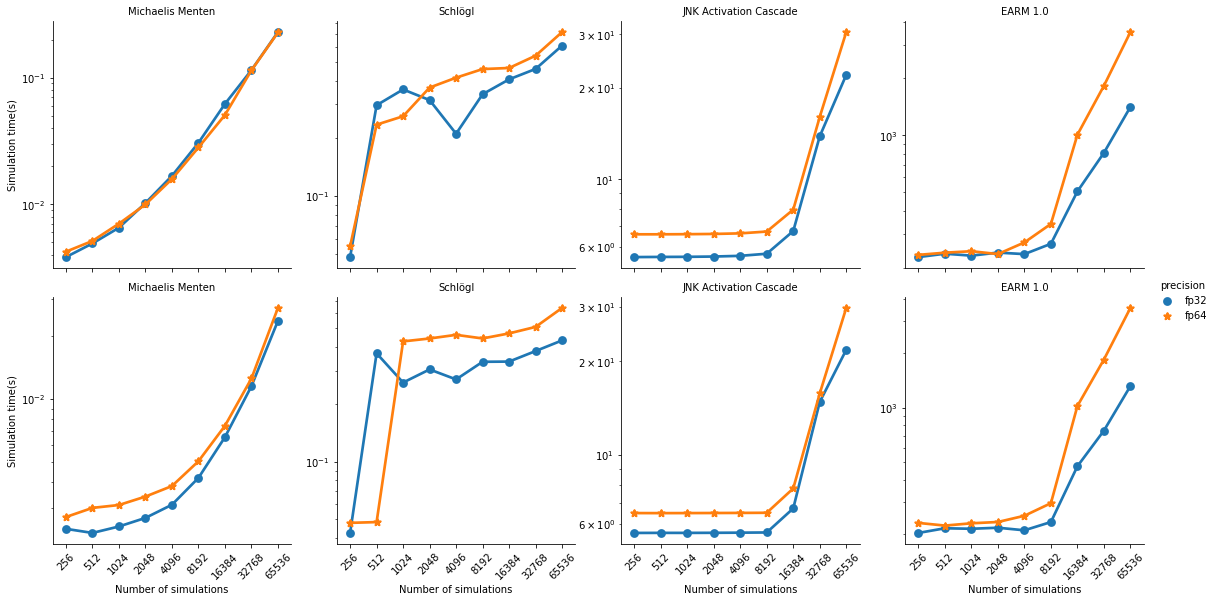

In [11]:
# plot fp64 vs fp32

rage = rage_df.loc[rage_df.device_name=='rage'].copy()
rage = rage.loc[rage.simulator.isin(['cuda', 'opencl'])].copy()
rage = rage[rage.opencl_args.isin(['','0:0','0:3'])].copy()
print(rage.head(5))

g = sns.catplot(
        x="n_sim", y="sim_time", hue="precision", 
        col="model_name", row='simulator', kind="point", data=rage, 
        sharey=False, 
#     col_wrap=2, 
    height=4, 
        col_order =model_names,
#         hue_order = ['fp32', 'fp64', ],
        markers=['o', '*',]
    )    

g.set_titles("{col_name}")
g.set_axis_labels("Number of simulations", "Simulation time(s)")
g.set(yscale="log")    
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
g.set_xticklabels(labels, rotation=45)

# EARM only

,device_name,end_time,gpu_name,model_name,n_sim,n_ts,sim_time,simulator,total_time,n_cpu,opencl_args,precision,sim_card
1,bad,20000,TeslaV100,EARM 1.0,256,101,6348.137200,bng,6356.825094,1,,fp64,TeslaV100_bng
2,bad,20000,TeslaV100,EARM 1.0,512,101,12628.227800,bng,12645.359526,1,,fp64,TeslaV100_bng
3,bad,20000,TeslaV100,EARM 1.0,1024,101,25805.277000,bng,25839.436697,1,,fp64,TeslaV100_bng
4,bad,20000,TeslaV100,EARM 1.0,2048,101,53670.920300,bng,53742.258672,1,,fp64,TeslaV100_bng
5,bad,20000,TeslaV100,EARM 1.0,4096,101,113075.984700,bng,113218.913081,1,,fp64,TeslaV100_bng
6,bad,20000,TeslaV100,EARM 1.0,8192,101,203555.371500,bng,203817.357286,1,,fp64,TeslaV100_bng
7,bad,20000,TeslaV100,EARM 1.0,16384,101,404603.918500,bng,405138.645481,1,,fp64,TeslaV100_bng
8,bad,20000,TeslaV100,EARM 1.0,32768,101,827438.203000,bng,828541.440838,1,,fp64,TeslaV100_bng
1,bad,20000,TeslaV100,EARM 1.0,256,101,216.748763,cuda,216.950264,1,,fp64,TeslaV100_cuda
2,bad,20000,TeslaV100,EARM 1.0,512,101,205.838771,cuda,206.103830,1,,fp64,TeslaV100_cuda


    n_sim       simulator        ratio
0     256       ratio_bng    29.287997
1     512       ratio_bng    61.350093
2    1024       ratio_bng   126.470517
3    2048       ratio_bng   256.243392
4    4096       ratio_bng   546.146632
5    8192       ratio_bng   859.588448
6   16384       ratio_bng  1078.652067
7   32768       ratio_bng   950.784765
9     256  ratio_stochkit     9.759502
10    512  ratio_stochkit    19.941141


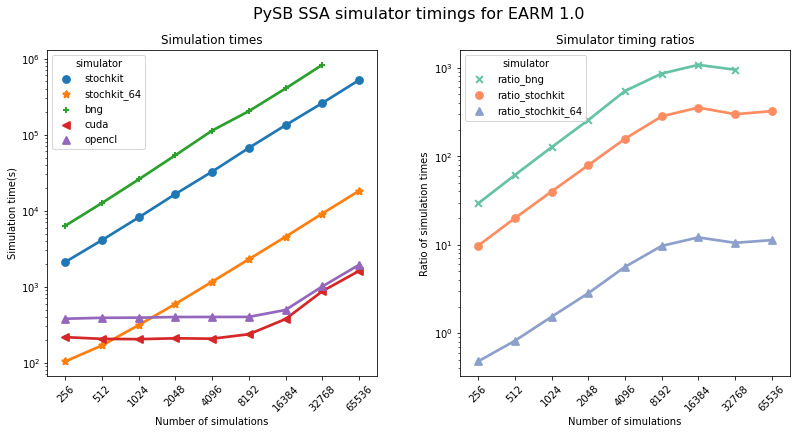

In [12]:
def plot_earm(data, save_name="time_compare"):
    earm_only = data.loc[data.model_name == 'EARM 1.0'].copy()
    earm_only.to_csv('earm_timing.csv')
    
    
    display(earm_only.head(10))
    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(121)
    g = sns.pointplot(
        x="n_sim", y="sim_time", hue="simulator", 
        col="model_name", kind="point", data=earm_only, 
        sharey=False, #col_wrap=1, height=1, 
        col_order = [ 'EARM 1.0'],
        hue_order = ['stochkit', 'stochkit_64', 'bng', 'cuda', 'opencl'],
        markers=['o', '*', '+', '<', '^'],
        ax=ax1
    )
    plt.title("Simulation times")
    plt.xlabel("Number of simulations")
    plt.ylabel("Simulation time(s)")
    g.set(yscale="log")    
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    g.set_xticklabels(labels, rotation=45)

    d = pd.pivot_table(
        earm_only[['model_name', 'n_sim', 'simulator', 'sim_time']],
        index=['model_name', 'n_sim'],
        columns='simulator',
        values='sim_time'
    )
    d['ratio_bng'] = d['bng'] / d['cuda']
    d['ratio_stochkit'] = d['stochkit'] / d['cuda']
    d['ratio_stochkit_64'] = d['stochkit_64'] / d['cuda']
    d.reset_index(inplace=True)
    
    ax2 = plt.subplot(1,2, 2)
    
    df = d[['n_sim', 'ratio_bng', 'ratio_stochkit', 'ratio_stochkit_64']]
    
    df = pd.melt(df,
                  id_vars='n_sim', 
                  value_vars=['ratio_bng', 'ratio_stochkit', 'ratio_stochkit_64'],
                  value_name='ratio', 
                 )
    df = df.loc[~df.ratio.isnull()]
    print(df.head(10))
    g = sns.pointplot(
        x="n_sim", y="ratio", hue="simulator", 
        kind="point", data=df, 
        sharey=False, #col_wrap=1, height=1, 
        palette="Set2",
        markers=['x', 'o', '^'],
        ax=ax2
    )
    g.set(yscale="log")    
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    g.set_xticklabels(labels, rotation=45)
    plt.title("Simulator timing ratios")
    plt.xlabel("Number of simulations")
    plt.ylabel("Ratio of simulation times")
    plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.15)
    plt.suptitle('PySB SSA simulator timings for EARM 1.0', size=16)
    plt.savefig('{}.png'.format(save_name), dpi=300, bbox_inches='tight', )
    plt.savefig('{}.pdf'.format(save_name), dpi=300, bbox_inches='tight')
plot_earm(tesla_results, 'earm_only_timing')

['GTX1080' 'GTX980Ti' 'RTX2080' 'RTX3090' 'Radeon Vii' 'TeslaK20c'
 'TeslaV100']
['GTX1080' 'GTX980Ti' 'RTX2080' 'RTX3090' 'Radeon Vii' 'TeslaK20c'
 'TeslaV100']
['GTX1080' 'GTX980Ti' 'RTX2080' 'RTX3090' 'Radeon Vii' 'TeslaK20c'
 'TeslaV100']
['GTX1080' 'GTX980Ti' 'RTX2080' 'RTX3090' 'Radeon Vii' 'TeslaK20c'
 'TeslaV100']


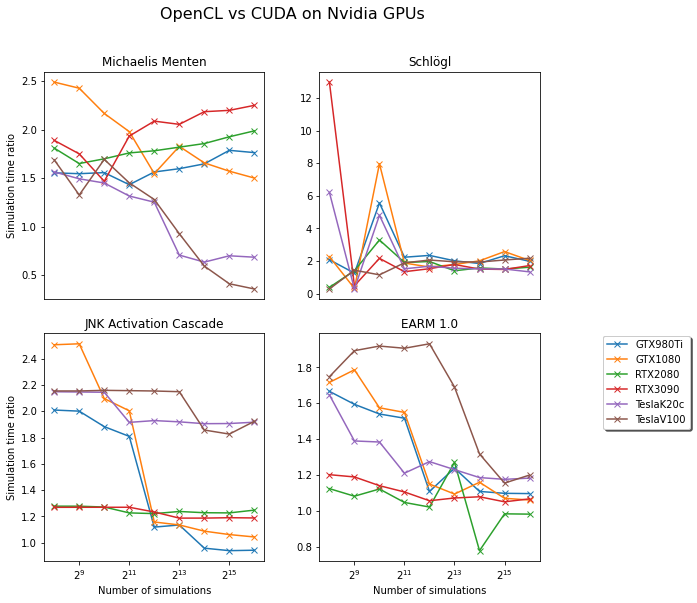

In [13]:
def plot_ratio_cuda_opencl(data, save_name="opencl_cl_ratio"):
    """
    Plots the ratio of BNG run times to GPU_SSA run times
    """
    df_gpu = data.loc[~data.gpu_name.isin(['GTX1060'])].copy()
    df_gpu = df_gpu.loc[~df_gpu.device_name.isin(['rage'])].copy()
#     df_gpu['n_gpus'] = 1
#     def count_gpus(x):
#         return len(x.split(','))
#     df_gpu['n_gpus'] = df_gpu['opencl_args'].apply(count_gpus)
#     print(df_gpu.head(10))
#     df_gpu = df_gpu.loc[~df_gpu.n_gpus==1].copy()
    
    d = pd.pivot_table(
        df_gpu[['model_name', 'n_sim', 'simulator', 'sim_time', 'gpu_name']],
        index=['model_name',  'gpu_name', 'n_sim',],
        columns='simulator',
        values='sim_time'
    )
    
    
    def f2(x):
        return '{0:.3f}'.format(x)
    d.to_latex('sum_table_latex.tex', 
               formatters={'bng': f2, 'cuda':f2, 'opencl':f2, 'stochkit':f2, 'stochkit_64':f2},
               bold_rows=True)
    d['ratio'] = d['opencl'] / d['cuda']
#     print(d[['ratio_bng', 'ratio_stochkit', 'ratio_stochkit_64']])
    d.reset_index(inplace=True)
#     d.to_csv('all_times.csv')
    
    count = 1
    fig = plt.figure(figsize=(8, 9))
    for i in model_names:
        
        ax = plt.subplot(2,2, count)
        plt.title(i)
        df = d.loc[d.model_name==i][['n_sim', 'ratio', 'gpu_name']]
        print(df.gpu_name.unique())
        gpus = [ 'GTX980Ti', 'GTX1080', 'RTX2080', 'RTX3090', 'TeslaK20c', 'TeslaV100']
        legends = []
        labels = []
        for i in gpus:
            dd = df.loc[df.gpu_name==i].copy()
            dd.sort_values('n_sim', inplace=True)
            l1,= plt.plot(dd['n_sim'], dd['ratio'], 'x-', label=i)
            
            legends.append(l1)
            labels.append(i)
        ax.set_xscale('log', base=2)    
#         ax.set_yscale('log', base=10) 
        plt.ylabel("Simulation time ratio")
        plt.xlabel("Number of simulations")
        
        if count in (1,2):
            plt.xlabel('')
            plt.xticks([])
        if count in (2, 4):
            plt.ylabel('')
        count+=1
        lgd = fig.legend(
            legends, labels,
            fancybox=True, shadow=True, 
            bbox_to_anchor=(1.2, .48),
        )
    plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.15)
    plt.suptitle('OpenCL vs CUDA on Nvidia GPUs', size=16)
    plt.savefig('{}.png'.format(save_name), dpi=300, bbox_inches='tight')# bbox_extra_artists=(lgd,),)
    plt.savefig('{}.pdf'.format(save_name), dpi=300, bbox_inches='tight')#bbox_extra_artists=(lgd,),)
plot_ratio_cuda_opencl(gpu_only)

['bng' 'cuda' 'stochkit' 'stochkit_64' 'cl_amd_cpu' 'opencl' 'cl_intel'
 'cl_intel_cpu' 'cl_intel    ' 'cl_intel_gpu']


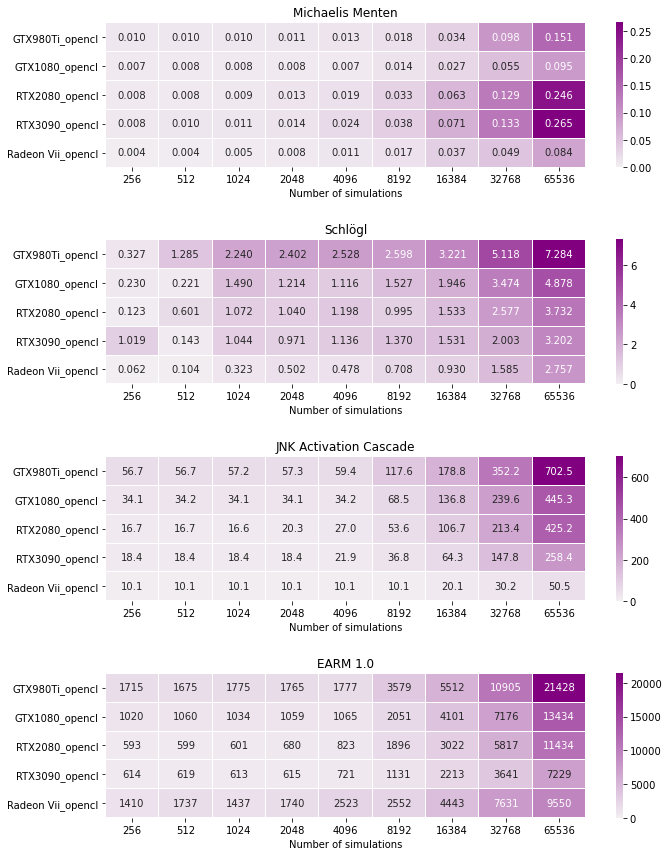

In [21]:
def compare_amd_nvidia():
    
    pal = sns.light_palette("purple", as_cmap=True)
    local_df = load_data()

    print(df.simulator.unique())
    gpus = [
        'cuda', 
        'opencl', 
        'cl_amd_cpu',
        'cl_amd_gpu'
        #'cl_intel_gpu', 'cl_amd', 'cl_nvidia'
    ]
    
    df_gpu =local_df.loc[local_df.simulator.isin(gpus)].copy()

    models = [
        'Michaelis Menten', 
        'Schlögl',
        'JNK Activation Cascade', 
        'EARM 1.0'
    ]
    df_gpu = df_gpu.loc[df_gpu.model_name.isin(models)].copy()

    fig = plt.figure(figsize=(10, 12))

    for n, m in enumerate(models):
        subset = df_gpu.loc[df_gpu['model_name'] == m].copy()

        d = pd.pivot_table(
            subset, index='sim_card', columns='n_sim', values='sim_time',
            fill_value=np.nan,
        )
#         print(d.index.values)
        keep = [
#             'Ryzen_3900x_cl_amd_cpu',
#             'HD7970_opencl',
            'GTX980Ti_opencl', 
#             'GTX980Ti_cuda',
            'GTX1080_opencl', 
#             'GTX1080_cuda', 
            'RTX2080_opencl',
#             'RTX2080_cuda',
            'RTX3090_opencl',
#             'RTX3090_cuda',
            
#             'TeslaK20c_opencl', 
#             'TeslaK20c_cuda',
#             'TeslaV100_opencl', 
            'Radeon Vii_opencl',
#             'TeslaV100_cuda',
#             'TeslaV100_opencl',
        ]
        d = d.reindex(keep)
        ax = fig.add_subplot(4, 1, n + 1)
        ax.set_title(m)
        if m == 'EARM 1.0':
            fmt = '.0f'
        elif m == 'JNK Activation Cascade':
            fmt = '0.1f'
        else:
            fmt = '.3f'
        sns.heatmap(data=d, cmap=pal, linewidths=0.01, vmin=0, annot=True,
                    fmt=fmt, ax=ax)
        plt.ylabel('')
        plt.xlabel("Number of simulations")
    plt.tight_layout()
    plt.subplots_adjust(hspace=.5)
    plt.savefig("compare_amd_nvidia_opencl.png", bbox_inches='tight', dpi=300)
    plt.show()


compare_amd_nvidia()

['bng' 'cuda' 'stochkit' 'stochkit_64' 'cl_amd_cpu' 'opencl' 'cl_intel'
 'cl_intel_cpu' 'cl_intel    ' 'cl_intel_gpu']
['GTX1080_cuda' 'GTX980Ti_cuda' 'RTX2080_cuda' 'RTX3090_cuda'
 'TeslaK20c_cuda' 'TeslaV100_cuda']
['GTX1080_cuda' 'GTX980Ti_cuda' 'RTX2080_cuda' 'RTX3090_cuda'
 'TeslaK20c_cuda' 'TeslaV100_cuda']
['GTX1080_cuda' 'GTX980Ti_cuda' 'RTX2080_cuda' 'RTX3090_cuda'
 'TeslaK20c_cuda' 'TeslaV100_cuda']
['GTX1080_cuda' 'GTX980Ti_cuda' 'RTX2080_cuda' 'RTX3090_cuda'
 'TeslaK20c_cuda' 'TeslaV100_cuda']


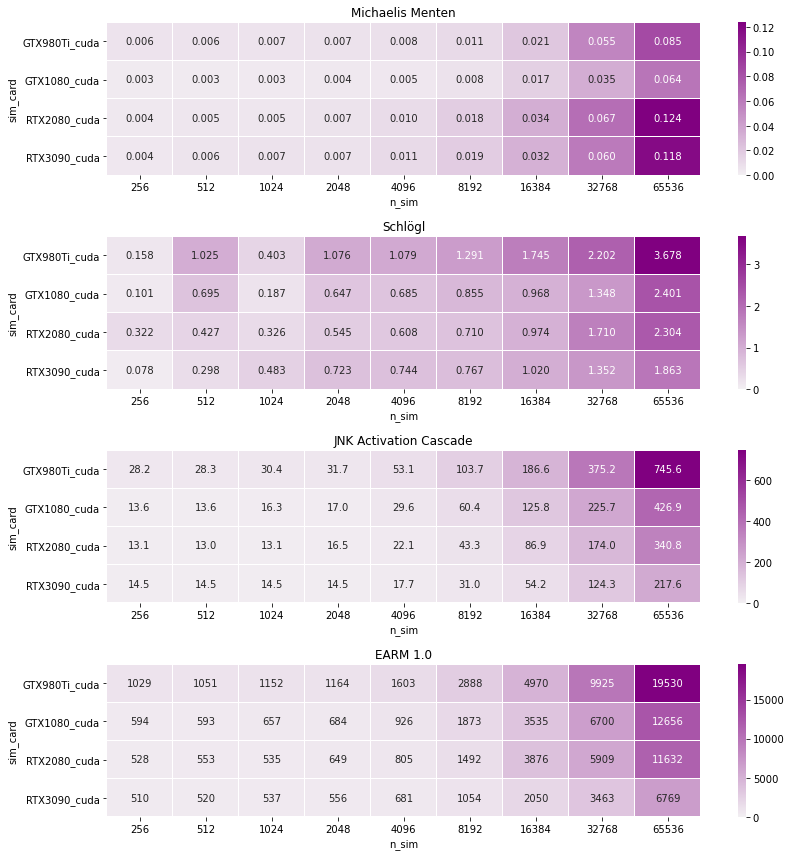

In [15]:
def compare_cuda_gpus():
    pal = sns.light_palette("purple", as_cmap=True)
    local_df = df.copy()
    print(df.simulator.unique())
    gpus = [
        'cuda', 
#         'opencl', 
#         'cl_amd_cpu',
#         'cl_amd_gpu'
        #'cl_intel_gpu', 'cl_amd', 'cl_nvidia'
    ]
    
    df_gpu =local_df.loc[local_df.simulator.isin(gpus)].copy()
#     df_gpu = gpu_only.copy()

    models = [
        'Michaelis Menten', 
        'Schlögl',
        'JNK Activation Cascade', 
        'EARM 1.0'
    ]
    df_gpu = df_gpu.loc[df_gpu.model_name.isin(models)].copy()
    df_gpu = df_gpu.loc[~df_gpu.gpu_name.isin(['GTX1060'])]

    fig = plt.figure(figsize=(12, 12))

    for n, m in enumerate(models):
        subset = df_gpu.loc[df_gpu['model_name'] == m].copy()

        d = pd.pivot_table(
            subset, index='sim_card', columns='n_sim', values='sim_time',
            fill_value=np.nan,
        )
        print(d.index.values)
        keep = [
            'GTX980Ti_cuda',
            'GTX1080_cuda', 
            'RTX2080_cuda' ,
            'RTX3090_cuda' ,
#             'TeslaK20c_opencl', 
#             'TeslaK20c_cuda',
#             'TeslaV100_opencl', 
#             'TeslaV100_cuda',
#             'Radeon Vii_opencl',
        ]
        d = d.reindex(keep)
        ax = fig.add_subplot(4, 1, n + 1)
        ax.set_title(m)
        if m == 'EARM 1.0':
            fmt = '.0f'
        elif m == 'JNK Activation Cascade':
            fmt = '0.1f'
        else:
            fmt = '.3f'
        sns.heatmap(data=d, cmap=pal, linewidths=0.01, vmin=0, annot=True,
                    fmt=fmt, ax=ax)

    plt.tight_layout(h_pad=0.5)
    plt.subplots_adjust(hspace=.4)
    plt.savefig("compare_consumer_nvidia_gpus.png", bbox_inches='tight', dpi=300)
    plt.show()


compare_cuda_gpus()

['bng' 'cuda' 'stochkit' 'stochkit_64' 'cl_amd_cpu' 'opencl' 'cl_intel'
 'cl_intel_cpu' 'cl_intel    ' 'cl_intel_gpu']
  device_name  end_time   gpu_name model_name  n_sim  n_ts       sim_time  \
1         bad     20000  TeslaV100   EARM 1.0    256   101    6348.137200   
2         bad     20000  TeslaV100   EARM 1.0    512   101   12628.227800   
3         bad     20000  TeslaV100   EARM 1.0   1024   101   25805.277000   
4         bad     20000  TeslaV100   EARM 1.0   2048   101   53670.920300   
5         bad     20000  TeslaV100   EARM 1.0   4096   101  113075.984700   
6         bad     20000  TeslaV100   EARM 1.0   8192   101  203555.371500   
7         bad     20000  TeslaV100   EARM 1.0  16384   101  404603.918500   
8         bad     20000  TeslaV100   EARM 1.0  32768   101  827438.203000   
1         bad     20000  TeslaV100   EARM 1.0    256   101     216.748763   
2         bad     20000  TeslaV100   EARM 1.0    512   101     205.838771   

  simulator     total_time  n_cpu

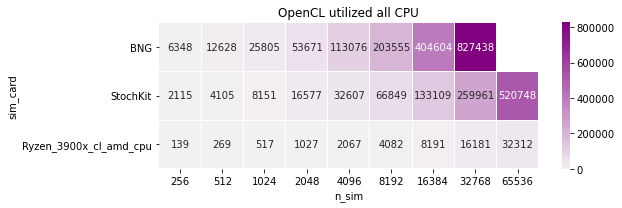

In [16]:
def compare_cpus_earm():
    pal = sns.light_palette("purple", as_cmap=True)
    local_df = df.copy()
    print(df.simulator.unique())
    gpus = [
        'cuda', 
        'opencl', 
        'cl_amd_cpu',
        'bng', 
        'stochkit', 
        'stochkit_64',
        
    ]
    df_gpu =local_df.loc[local_df.simulator.isin(gpus)].copy()
    

#     df_gpu = gpu_only.copy()

    models = [
#         'Michaelis Menten', 
#         'Schlögl',
#         'JNK Activation Cascade', 
        'EARM 1.0'
    ]
    df_gpu = df_gpu.loc[df_gpu.model_name.isin(models)].copy()
    df_gpu = df_gpu.loc[~df_gpu.gpu_name.isin(['GTX1060'])]
    df_gpu.loc[df_gpu.sim_card=='TeslaV100_stochkit', 'sim_card']= 'StochKit'
    df_gpu.loc[df_gpu.sim_card=='TeslaV100_stochkit_64', 'sim_card']= 'StochKit_64'
    df_gpu.loc[df_gpu.sim_card=='TeslaV100_bng', 'sim_card']= 'BNG'
    print(df_gpu.head(10))
    fig = plt.figure(figsize=(9, 3))


    subset = df_gpu.loc[df_gpu['model_name'] == 'EARM 1.0'].copy()

    d = pd.pivot_table(
        subset, index='sim_card', columns='n_sim', values='sim_time',
        fill_value=np.nan,
    )
    print(d.index.values)
    keep = [
        'BNG', 'StochKit', 
        'Ryzen_3900x_cl_amd_cpu',
#         'GTX980Ti_cuda',
#         'GTX1080_cuda', 
#         'RTX2080_cuda' ,
#         'RTX3090_cuda' ,
#             'TeslaK20c_opencl', 
#             'TeslaK20c_cuda',
#             'TeslaV100_opencl', 
#         'TeslaV100_cuda',
#             'Radeon Vii_opencl',
    ]
    d = d.reindex(keep)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('OpenCL utilized all CPU')

    fmt = '.0f'
    
    sns.heatmap(data=d, cmap=pal, linewidths=0.01, vmin=0, annot=True,
                fmt=fmt, ax=ax)
    plt.yticks(rotation=0) 
    plt.tight_layout(h_pad=0.5)
    plt.subplots_adjust(hspace=.4)
    plt.savefig("compare_consumer_cpus.png", bbox_inches='tight', dpi=300)
    plt.show()


compare_cpus_earm()

['bng' 'cuda' 'stochkit' 'stochkit_64' 'cl_amd_cpu' 'opencl' 'cl_intel'
 'cl_intel_cpu' 'cl_intel    ' 'cl_intel_gpu']
['GTX1080_cuda' 'GTX980Ti_cuda' 'RTX2080_cuda' 'RTX3090_cuda'
 'TeslaK20c_cuda' 'TeslaV100_cuda']


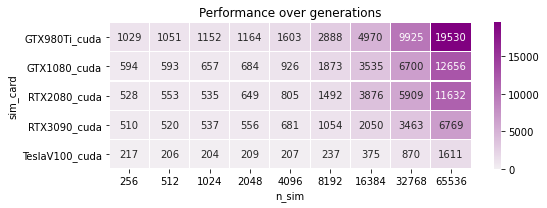

In [24]:
def compare_cuda_gpus_earm():
    pal = sns.light_palette("purple", as_cmap=True)
    local_df = df.copy()
    print(df.simulator.unique())
    gpus = [
        'cuda', 
#         'opencl', 
#         'cl_amd_cpu',
#         'cl_amd_gpu'
        #'cl_intel_gpu', 'cl_amd', 'cl_nvidia'
    ]
    
    df_gpu = local_df.loc[local_df.simulator.isin(gpus)].copy()
#     df_gpu = gpu_only.copy()

    models = [
#         'Michaelis Menten', 
#         'Schlögl',
#         'JNK Activation Cascade', 
        'EARM 1.0'
    ]
    df_gpu = df_gpu.loc[df_gpu.model_name.isin(models)].copy()
    df_gpu = df_gpu.loc[~df_gpu.gpu_name.isin(['GTX1060'])]

    fig = plt.figure(figsize=(8, 3))


    subset = df_gpu.loc[df_gpu['model_name'] == 'EARM 1.0'].copy()

    d = pd.pivot_table(
        subset, index='sim_card', columns='n_sim', values='sim_time',
        fill_value=np.nan,
    )
    print(d.index.values)
    keep = [
        'GTX980Ti_cuda',
        'GTX1080_cuda', 
        'RTX2080_cuda' ,
        'RTX3090_cuda' ,
#             'TeslaK20c_opencl', 
#             'TeslaK20c_cuda',
#             'TeslaV100_opencl', 
        'TeslaV100_cuda',
#             'Radeon Vii_opencl',
    ]
    d = d.reindex(keep)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Performance over generations')

    fmt = '.0f'
    
    sns.heatmap(data=d, cmap=pal, linewidths=0.01, vmin=0, annot=True,
                fmt=fmt, ax=ax)

    plt.tight_layout(h_pad=0.5)
    plt.subplots_adjust(hspace=.4)
    plt.savefig("compare_consumer_nvidia_gpus.png", bbox_inches='tight', dpi=300)
    plt.show()


compare_cuda_gpus_earm()

   device_name  end_time   gpu_name        model_name  n_sim  n_ts   sim_time  \
1          bad       100  TeslaV100  Michaelis Menten    256   101   0.755400   
2          bad       100  TeslaV100  Michaelis Menten    512   101   1.462000   
3          bad       100  TeslaV100  Michaelis Menten   1024   101   2.926800   
4          bad       100  TeslaV100  Michaelis Menten   2048   101   5.858100   
5          bad       100  TeslaV100  Michaelis Menten   4096   101  11.741400   
..         ...       ...        ...               ...    ...   ...        ...   
5         puma       100  TeslaK20c  Michaelis Menten   4096   101   0.007309   
6         puma       100  TeslaK20c  Michaelis Menten   8192   101   0.014400   
7         puma       100  TeslaK20c  Michaelis Menten  16384   101   0.024550   
8         puma       100  TeslaK20c  Michaelis Menten  32768   101   0.043161   
9         puma       100  TeslaK20c  Michaelis Menten  65536   101   0.087412   

   simulator  total_time  n

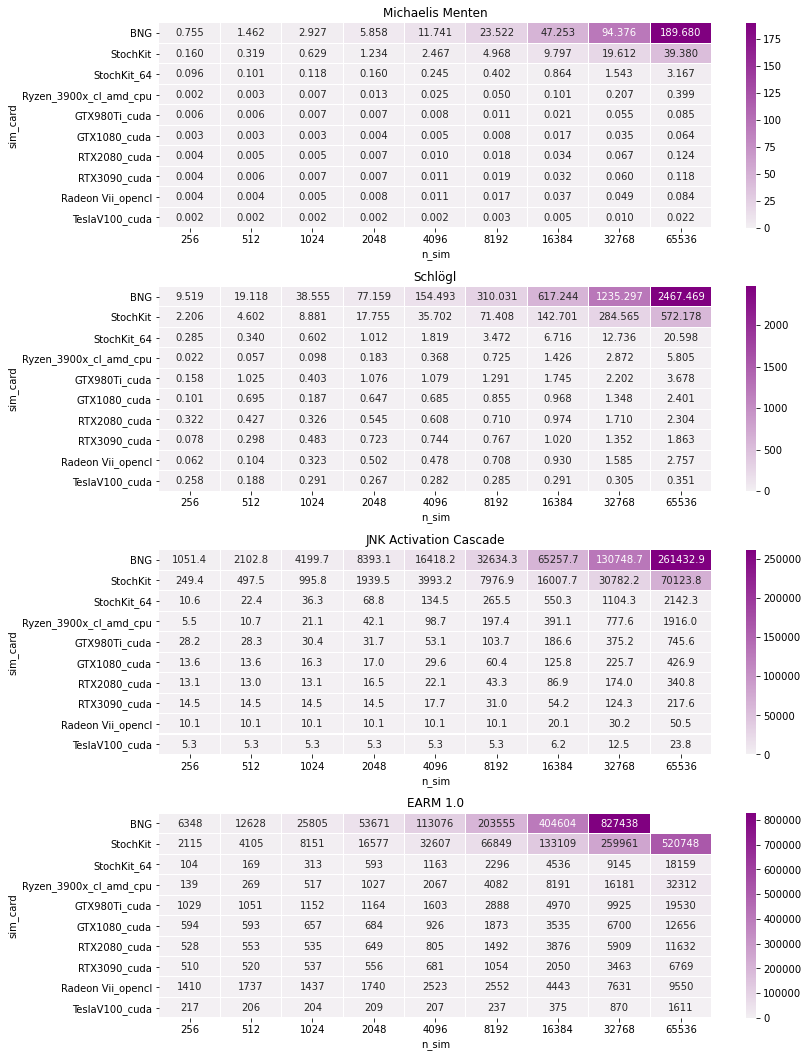

In [18]:
def timing_summary():
    pal = sns.light_palette("purple", as_cmap=True)
    local_df = df.copy()
    gpus = [
        'cuda', 
        'opencl', 
        'cl_amd_cpu',
        'bng', 
        'stochkit', 
        'stochkit_64',
        
    ]
    
    df_gpu = local_df.loc[local_df.simulator.isin(gpus)].copy()
    df_gpu.loc[df_gpu.sim_card=='TeslaV100_stochkit', 'sim_card']= 'StochKit'
    df_gpu.loc[df_gpu.sim_card=='TeslaV100_stochkit_64', 'sim_card']= 'StochKit_64'
    df_gpu.loc[df_gpu.sim_card=='TeslaV100_bng', 'sim_card']= 'BNG'
    models = [
        'Michaelis Menten', 
        'Schlögl',
        'JNK Activation Cascade', 
        'EARM 1.0'
    ]
    df_gpu = df_gpu.loc[df_gpu.model_name.isin(models)].copy()
    df_gpu = df_gpu.loc[~df_gpu.gpu_name.isin(['GTX1060'])]

    fig = plt.figure(figsize=(12, 18))

    for n, m in enumerate(models):
        subset = df_gpu.loc[df_gpu['model_name'] == m].copy()
        print(subset)
       
        d = pd.pivot_table(
            subset, index='sim_card', columns='n_sim', values='sim_time',
            fill_value=np.nan,
        )
        print(d.index.values)
        keep = [
            'BNG', 'StochKit', 'StochKit_64',
            'Ryzen_3900x_cl_amd_cpu',
#             'HD7970_opencl',
#             'GTX980Ti_opencl', 
            'GTX980Ti_cuda',
#             'GTX1080_opencl', 
            'GTX1080_cuda', 
#             'RTX2080_opencl',
            'RTX2080_cuda' ,
            'RTX3090_cuda',
            'Radeon Vii_opencl',
#             'TeslaK20c_opencl', 'TeslaK20c_cuda',
#             'TeslaV100_opencl', 
            'TeslaV100_cuda',
        ]
        d = d.reindex(keep)
        ax = fig.add_subplot(5, 1, n + 1)
        ax.set_title(m)
        if m == 'EARM 1.0':
            fmt = '.0f'
        elif m == 'JNK Activation Cascade':
            fmt = '0.1f'
        else:
            fmt = '.3f'
        sns.heatmap(data=d, cmap=pal, linewidths=0.01, vmin=0, annot=True,
                    fmt=fmt, ax=ax)

    plt.tight_layout()
    plt.savefig("compare_gpus.png", bbox_inches='tight', dpi=300)
    plt.show()


timing_summary()

   device_name  end_time   gpu_name        model_name  n_sim  n_ts   sim_time  \
1          bad       100  TeslaV100  Michaelis Menten    256   101   0.755400   
2          bad       100  TeslaV100  Michaelis Menten    512   101   1.462000   
3          bad       100  TeslaV100  Michaelis Menten   1024   101   2.926800   
4          bad       100  TeslaV100  Michaelis Menten   2048   101   5.858100   
5          bad       100  TeslaV100  Michaelis Menten   4096   101  11.741400   
..         ...       ...        ...               ...    ...   ...        ...   
5         puma       100  TeslaK20c  Michaelis Menten   4096   101   0.007309   
6         puma       100  TeslaK20c  Michaelis Menten   8192   101   0.014400   
7         puma       100  TeslaK20c  Michaelis Menten  16384   101   0.024550   
8         puma       100  TeslaK20c  Michaelis Menten  32768   101   0.043161   
9         puma       100  TeslaK20c  Michaelis Menten  65536   101   0.087412   

   simulator  total_time  n

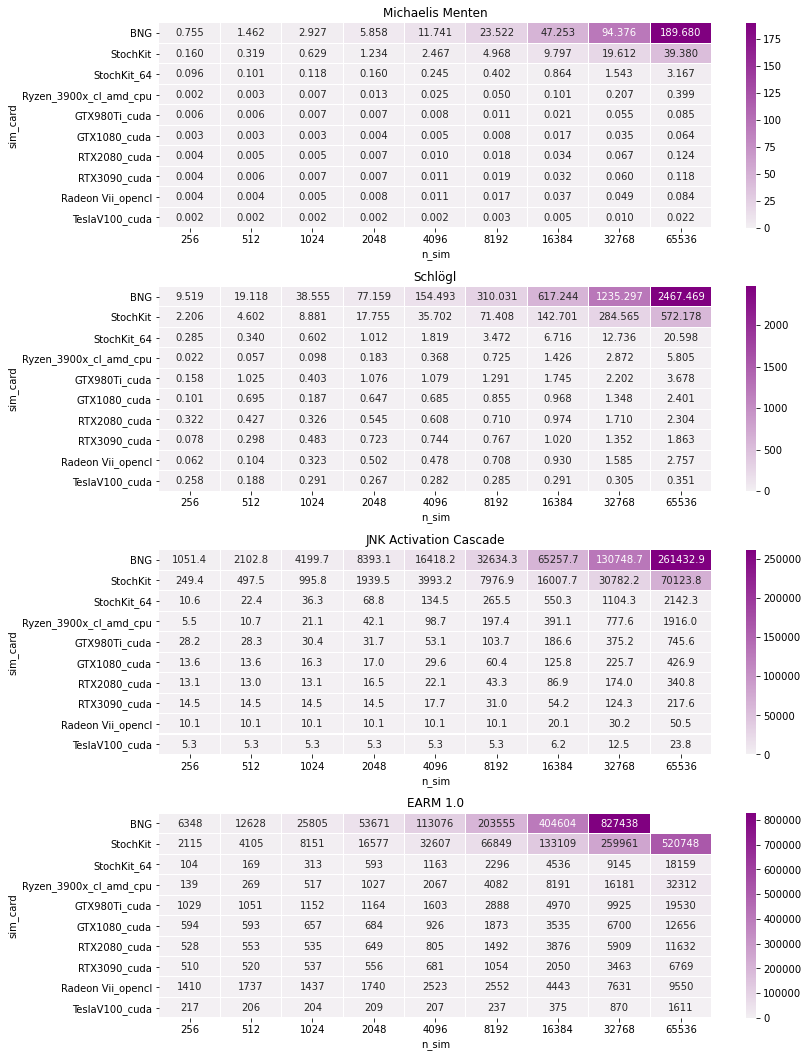

In [19]:
def timing_summary():
    pal = sns.light_palette("purple", as_cmap=True)
    local_df = df.copy()
    gpus = [
        'cuda', 
        'opencl', 
        'cl_amd_cpu',
        'bng', 
        'stochkit', 
        'stochkit_64',
        
    ]
    
    df_gpu = local_df.loc[local_df.simulator.isin(gpus)].copy()
    df_gpu.loc[df_gpu.sim_card=='TeslaV100_stochkit', 'sim_card']= 'StochKit'
    df_gpu.loc[df_gpu.sim_card=='TeslaV100_stochkit_64', 'sim_card']= 'StochKit_64'
    df_gpu.loc[df_gpu.sim_card=='TeslaV100_bng', 'sim_card']= 'BNG'
    models = [
        'Michaelis Menten', 
        'Schlögl',
        'JNK Activation Cascade', 
        'EARM 1.0'
    ]
    df_gpu = df_gpu.loc[df_gpu.model_name.isin(models)].copy()
    df_gpu = df_gpu.loc[~df_gpu.gpu_name.isin(['GTX1060'])]

    fig = plt.figure(figsize=(12, 18))

    for n, m in enumerate(models):
        subset = df_gpu.loc[df_gpu['model_name'] == m].copy()
        print(subset)
       
        d = pd.pivot_table(
            subset, index='sim_card', columns='n_sim', values='sim_time',
            fill_value=np.nan,
        )
        print(d.index.values)
        keep = [
            'BNG', 'StochKit', 'StochKit_64',
            'Ryzen_3900x_cl_amd_cpu',
#             'HD7970_opencl',
#             'GTX980Ti_opencl', 
            'GTX980Ti_cuda',
#             'GTX1080_opencl', 
            'GTX1080_cuda', 
#             'RTX2080_opencl',
            'RTX2080_cuda' ,
            'RTX3090_cuda',
            'Radeon Vii_opencl',
#             'TeslaK20c_opencl', 'TeslaK20c_cuda',
#             'TeslaV100_opencl', 
            'TeslaV100_cuda',
        ]
        d = d.reindex(keep)
        ax = fig.add_subplot(5, 1, n + 1)
        ax.set_title(m)
        if m == 'EARM 1.0':
            fmt = '.0f'
        elif m == 'JNK Activation Cascade':
            fmt = '0.1f'
        else:
            fmt = '.3f'
        sns.heatmap(data=d, cmap=pal, linewidths=0.01, vmin=0, annot=True,
                    fmt=fmt, ax=ax)

    plt.tight_layout()
    plt.savefig("compare_gpus.png", bbox_inches='tight', dpi=300)
    plt.show()


timing_summary()

In [20]:
times = pd.read_csv('Timings/times.csv')
times.head(10)
times.gpu_name.unique()

ParserError: Error tokenizing data. C error: Expected 9 fields in line 4929, saw 10


In [ ]:
subset = times.loc[
    (times.gpu_name.str.contains('7970'))# & (times.model_name.isin(['pysb.examples.earm_1_0']))
#     & (times.end_time ==20000)
]

In [ ]:
subset

In [ ]:
subset.to_csv('t.csv')

In [ ]:
94.45/25

In [ ]:
2100/60
